Credit to Hans-Petter Halvorsen and his "Mass-Spring-Damper system with Python" slides for equations and code framework

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The following code graphs and displacement and velocity at a given time of the mass-spring-damper system. It uses the following equation: $$F(t) - c \frac{du}{dt} - kx(t) = m \frac{d^2 u}{dx^2}$$, where $t$ is the time that has passed, $F(t)$ is the external force applied to the system, $c$ is the damping constant, $k$ is the stiffness of the spring, and $m$ is the mass. 

In [3]:
tstart = 0
tstop = 60
increment = 0.1

# Initial condition
x_init = [0,0]
t = np.arange(tstart,tstop+1,increment)
F = int(input("How much force would you like to apply? "))

# Function that returns dx/dt
def mydiff(x, t):
    c = 4 # Damping constant
    k = 2 # Stiffness of the spring
    m = 20 # Mass
    # F = 5
    dx1dt = x[1]
    dx2dt = (F - c*x[1] - k*x[0])/m
    dxdt = [dx1dt, dx2dt]
    return dxdt

How much force would you like to apply? 5


In the following lines, $x_1$ is the position $x(t)$ and $x_2$ is the velocity $\frac{dx}{dt}$

It solves the system of equations
$$\begin{cases}
    \frac{dx_1}{dt} = x_2\\
    \frac{dx_2}{dt} = \frac{1}{m}(F - cx_2 - kx_1)
\end{cases} $$

where $x = x_1$ and $\frac{dx}{dt} = x_2$

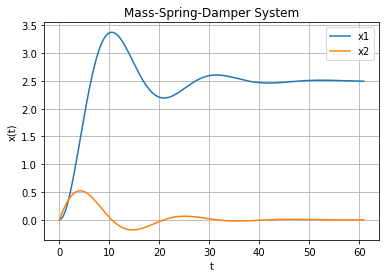

In [4]:
# Solve ODE
x = odeint(mydiff, x_init, t)
x1 = x[:,0]
x2 = x[:,1]
# Plotting results
plt.plot(t,x1)
plt.plot(t,x2)
plt.title('Mass-Spring-Damper System')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(["x1", "x2"])
plt.grid()
plt.show()

Credit to @enesdemirag and their "mass-spring-damper-system" code and explanation

In [34]:
from matplotlib import pyplot as plt
from matplotlib import animation

In [38]:
class Visualizer(object):
    def __init__(self, callback=None, interval=100.0, simulation_time=20.0, initial=(0, 0, 0, 0, 0, 0)):
        # Set loop interval
        self.interval = interval
        self.simulation_time = simulation_time
        # Create figure
        self.fig = plt.figure(1, figsize=(13, 6), dpi=80)
        # Create animation plot area
        self.animation_plot = self.fig.add_subplot(223)
        # Create position plot
        self.position_plot = self.fig.add_subplot(221)
        self.position_plot.set_xlim((0, self.simulation_time))
        self.position_plot.set_ylim((-20, 20))
        self.position_plot_patch = GraphPlot()
        self.position_plot.add_patch(self.position_plot_patch.first_patch)
        self.position_plot.add_patch(self.position_plot_patch.second_patch)
        self.position_plot.text(0.85, 0.8, 'Red:  x\nBlue: y', transform=self.position_plot.transAxes)
        self.position_plot.text(0.03, 0.9, 'Position Plot', transform=self.position_plot.transAxes)
        # Create velocity plot
        self.velocity_plot = self.fig.add_subplot(222)
        self.velocity_plot.set_xlim((0, self.simulation_time))
        self.velocity_plot.set_ylim((-20, 20))
        self.velocity_plot_patch = GraphPlot()
        self.velocity_plot.add_patch(self.velocity_plot_patch.first_patch)
        self.velocity_plot.add_patch(self.velocity_plot_patch.second_patch)
        self.velocity_plot.text(0.83, 0.8, 'Red:  Vx\nBlue: Vy', transform=self.velocity_plot.transAxes)
        self.velocity_plot.text(0.03, 0.9, 'Velocity Plot', transform=self.velocity_plot.transAxes)
        # Create acceleration plot
        self.acceleration_plot = self.fig.add_subplot(224)
        self.acceleration_plot.set_xlim((0, self.simulation_time))
        self.acceleration_plot.set_ylim((-30, 30))
        self.acceleration_plot_patch = GraphPlot()
        self.acceleration_plot.add_patch(self.acceleration_plot_patch.first_patch)
        self.acceleration_plot.add_patch(self.acceleration_plot_patch.second_patch)
        self.acceleration_plot.text(0.83, 0.8, 'Red:  Ax\nBlue: Ay', transform=self.acceleration_plot.transAxes)
        self.acceleration_plot.text(0.03, 0.9, 'Acceleration Plot', transform=self.acceleration_plot.transAxes)
        # Create dynamic label for simulation time
        self.sim_time_label = self.animation_plot.text(0.03, 0.9, '', transform=self.animation_plot.transAxes)
        # Set axes limit
        self.animation_plot.set_xlim((-20, 20))
        self.animation_plot.set_ylim((0, 30))
        # Create the mass object
        self.patch = plt.Rectangle((0, 0), width=10, height=5, fc='b')
        # Add the patches
        self.animation_plot.add_patch(self.patch)
        # Create animation core
        self.animate = animation.FuncAnimation(self.fig, self.animate, interval=self.interval,
                                               blit=True, repeat=True, init_func=self.init_func)
        # Set initials to zero
        self.sim_time = 0
        self.x = initial[0]
        self.y = initial[1]
        self.vx = initial[2]
        self.vy = initial[3]
        self.ax = initial[4]
        self.ay = initial[5]
        # Set callback
        self.cb_func = callback
        plt.show()

    def init_func(self):
        # Set initials to zero
        self.sim_time_label.set_text("")
        self.patch.xy = (0, 0)

        pos_plot = self.position_plot_patch.init_func()
        vel_plot = self.velocity_plot_patch.init_func()
        acc_plot = self.acceleration_plot_patch.init_func()
        ret_ = [self.patch, self.sim_time_label] + acc_plot + vel_plot + pos_plot
        # return the objects to be redrawn
        return ret_

    def animate(self, i):
        # update simulation time, i = n'th time that the method has
        # called, thus each represents self.interval ms of delay.
        self.sim_time = float(i) / (1000.0 / self.interval)

        # Update time
        self.sim_time_label.set_text("Simulation Time: " + str(self.sim_time))

        # Get object xy from callback
        (x, y) = self.cb_func(self.sim_time)
        # Set the position of object
        vx = (x - self.x) / (self.interval / 1000.0)
        vy = (y - self.y) / (self.interval / 1000.0)

        self.ax = (vx - self.vx) / (self.interval / 1000.0)
        self.ay = (vy - self.vy) / (self.interval / 1000.0)
        self.vx = vx
        self.vy = vy
        self.x = x
        self.y = y
        self.patch.xy = (x - 5, y - 2.5)

        pos_plot = self.position_plot_patch.update([[self.sim_time, x], [self.sim_time, y]])
        vel_plot = self.velocity_plot_patch.update([[self.sim_time, vx], [self.sim_time, vy]])
        acc_plot = self.acceleration_plot_patch.update([[self.sim_time, self.ax], [self.sim_time, self.ay]])
        ret_ = [self.patch, self.sim_time_label] + acc_plot + vel_plot + pos_plot
        # return the objects to be redrawn
        return ret_

In [39]:
class GraphPlot():
    def __init__(self):
        self.first_patch = plt.Polygon([[0, 0]], closed=None, fill=None, edgecolor='r')
        self.second_patch = plt.Polygon([[0, 0]], closed=None, fill=None, edgecolor='b')

    def init_func(self):
        self.first_patch.xy = [[0, 0]]
        self.second_patch.xy = [[0, 0]]
        return [self.first_patch, self.second_patch]

    def update(self, data):
        # Add current x position to x graph
        arr = self.first_patch.get_xy().tolist()
        arr.append(data[0])
        self.first_patch.xy = arr

        # Add current y position to y graph
        arr = self.second_patch.get_xy().tolist()
        arr.append(data[1])
        self.second_patch.xy = arr

        return [self.first_patch, self.second_patch]

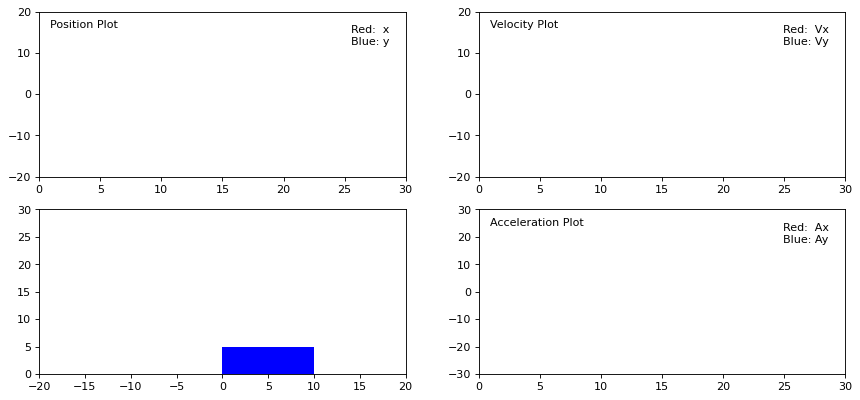

In [40]:
dt = 0.05 # ΔT (sampling period) seconds

# Initial values
position = 15
velocity = 0
acceleration = 0

# Constants
mass = 1 # mass
k = 2.5 # spring coefficient
b = 0.3 # damping coefficient

# Callback Function
def set(arg):
    global dt, position, velocity, acceleration, mass, k, b # Get global variables

    spring_force = k * position # Fs = k * x
    damper_force = b * velocity # Fb = b * x'

    # If we leave the acceleration alone in equation
    # acceleration = - ((b * velocity) + (k * position)) / mass
    acceleration = - (spring_force + damper_force) / mass
    velocity += (acceleration * dt) # Integral(a) = v
    position += (velocity * dt) # Integral(v) = x

    return (position, 0) # Return position

# Start simulation
Visualizer(callback=set, interval=dt * 1000, simulation_time=30, initial=(position, 0, velocity, 0, acceleration, 0))

Taichi code:

In [42]:
import taichi as ti

ti.init(arch=ti.gpu)

n = 320
pixels = ti.field(dtype=float, shape=(n * 2, n))

@ti.func
def complex_sqr(z):
    return ti.Vector([z[0]**2 - z[1]**2, z[1] * z[0] * 2])

@ti.kernel
def paint(t: float):
    for i, j in pixels:  # Parallelized over all pixels
        c = ti.Vector([-0.8, ti.cos(t) * 0.2])
        z = ti.Vector([i / n - 1, j / n - 0.5]) * 2
        iterations = 0
        while z.norm() < 20 and iterations < 50:
            z = complex_sqr(z) + c
            iterations += 1
        pixels[i, j] = 1 - iterations * 0.02

gui = ti.GUI("Julia Set", res=(n * 2, n))

i = 0
while gui.running:
    paint(i * 0.03)
    gui.set_image(pixels)
    gui.show()
    i = i + 1

[Taichi] Starting on arch=metal


In [66]:
import numpy as np
X = np.random.random((1, 2))
Y = np.random.random((1, 2))
Z = np.random.random((1, 2))
print(X)
print(Y)
print(Z)
gui = ti.GUI("triangles", res=(400, 400))
i = 0
j = 0
while gui.running:
    gui.triangles(a=X+i, b=Y, c=Z, color=0xED553B)
    if j < 100:
        i = 0.01
    elif j < 200:
        i = -0.01
    else:
        j = 0
    j += 1
    gui.show()

[[0.54154467 0.67971662]]
[[0.37129016 0.9780596 ]]
[[0.96399261 0.27212686]]
